# Step 1 : Data Loading and Data Understanding

In [213]:
# Import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [8]:
#!pip install scikit-learn

In [231]:
# Create Dataset by reading the Day.csv file

bikesharedata = pd.read_csv("C:\ProgramData\day.csv")

### Data Inspection

In [232]:
# Check  the head of Data Set
bikesharedata.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [233]:
# Check the Shape of Data Set
bikesharedata.shape

(730, 16)

In [234]:
# Identify mean medium , Mode , Standard deviation for the Data Set
bikesharedata.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [235]:
# Get information about the dataset columns
bikesharedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Data Cleansing

In [236]:
# Check for null values
bikesharedata.isnull().sum()*100/df.shape[0]
# There are no NULL values in the dataset, hence it is clean.

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

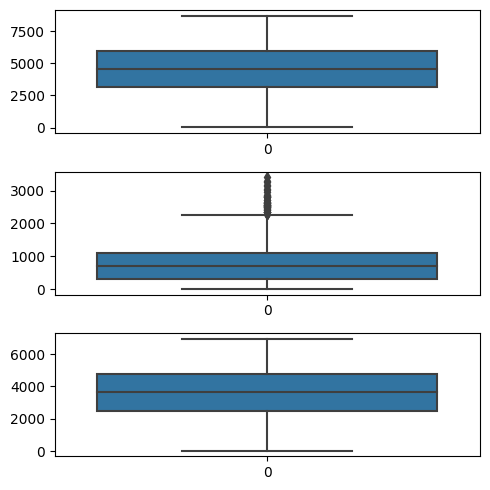

In [237]:
#Outlier Analysis

fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(bikesharedata['cnt'], ax = axs[0])
plt2 = sns.boxplot(bikesharedata['casual'], ax = axs[1])
plt3 = sns.boxplot(bikesharedata['registered'], ax = axs[2])

plt.tight_layout()

In [29]:
# There are no considerable outliers present in the bike share data so no need to remove outliers

# Step 2 : Pre Processing Steps

In [238]:
# dropping redundant columns casual and registered as these total upto cnt (count)

bikesharedata.drop(['casual','registered'], axis = 1, inplace = True)

In [239]:
# Dropping two more columns on further analysis . Date is redundant as we have year and month. 
#instant is nothing but row index which is irrelevant

bikesharedata.drop(['instant','dteday'], axis = 1, inplace = True)

In [240]:
#Checking if columns dropped 
bikesharedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [241]:
#Mapping allvalues of categorical variables from Data set
# Mapping Season column 

bikesharedata.season = bikesharedata.season.map({1:'spring', 2:'summer', 3:'autumn', 4:'winter'})

In [242]:
#Mapping Month column

bikesharedata.mnth = bikesharedata.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [243]:
#Mapping days of the week

bikesharedata.weekday = bikesharedata.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [244]:
#Mapping the weathersit column

bikesharedata.weathersit = bikesharedata.weathersit.map({1:'clear',2:'cloudy',3:'light_rain',4:'Heavy_rain'})

In [245]:
#Mapping Working Day
#bikesharedata.workingday = bikesharedata.workingday.map({0:'non_working',1:'working'})

In [246]:
#Mapping Holiday as per US Calendar
#bikesharedata.holiday = bikesharedata.holiday.map({'not_holiday':0,'holiday':1})

In [247]:
#Checking the heads of the dataset
bikesharedata.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [248]:
# Dummy variable creation for month, weekday, weathersit and season variables.

months_df=pd.get_dummies(bikesharedata.mnth,drop_first=True)
weekdays_df=pd.get_dummies(bikesharedata.weekday,drop_first=True)
weathersit_df=pd.get_dummies(bikesharedata.weathersit,drop_first=True)
seasons_df=pd.get_dummies(bikesharedata.season,drop_first=True)

In [249]:
# Merging  the dataframe, with the dummy variable dataset. 

bikesharedata = pd.concat([bikesharedata,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [120]:
bikesharedata.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,sat,sun,thu,tue,wed,cloudy,light_rain,spring,summer,winter
0,spring,0,jan,0,sat,non_working,cloudy,14.110847,18.18125,80.5833,...,True,False,False,False,False,True,False,True,False,False
1,spring,0,jan,0,sun,non_working,cloudy,14.902598,17.68695,69.6087,...,False,True,False,False,False,True,False,True,False,False
2,spring,0,jan,0,mon,working,clear,8.050924,9.47025,43.7273,...,False,False,False,False,False,False,False,True,False,False
3,spring,0,jan,0,tue,working,clear,8.200000,10.60610,59.0435,...,False,False,False,True,False,False,False,True,False,False
4,spring,0,jan,0,wed,working,clear,9.305237,11.46350,43.6957,...,False,False,False,False,True,False,False,True,False,False


# Step 3 : Exploratory Data Analysis

### Univariate Analysis

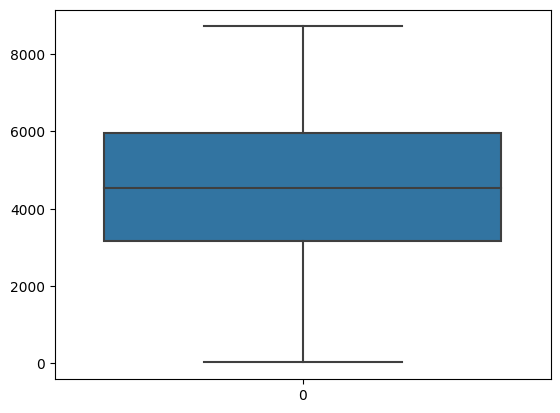

In [250]:
#Target variable is count as we are modelling the demand for shared bike rides from point a to point b
sns.boxplot(bikesharedata['cnt'])
plt.show()

### Bivariate Analysis

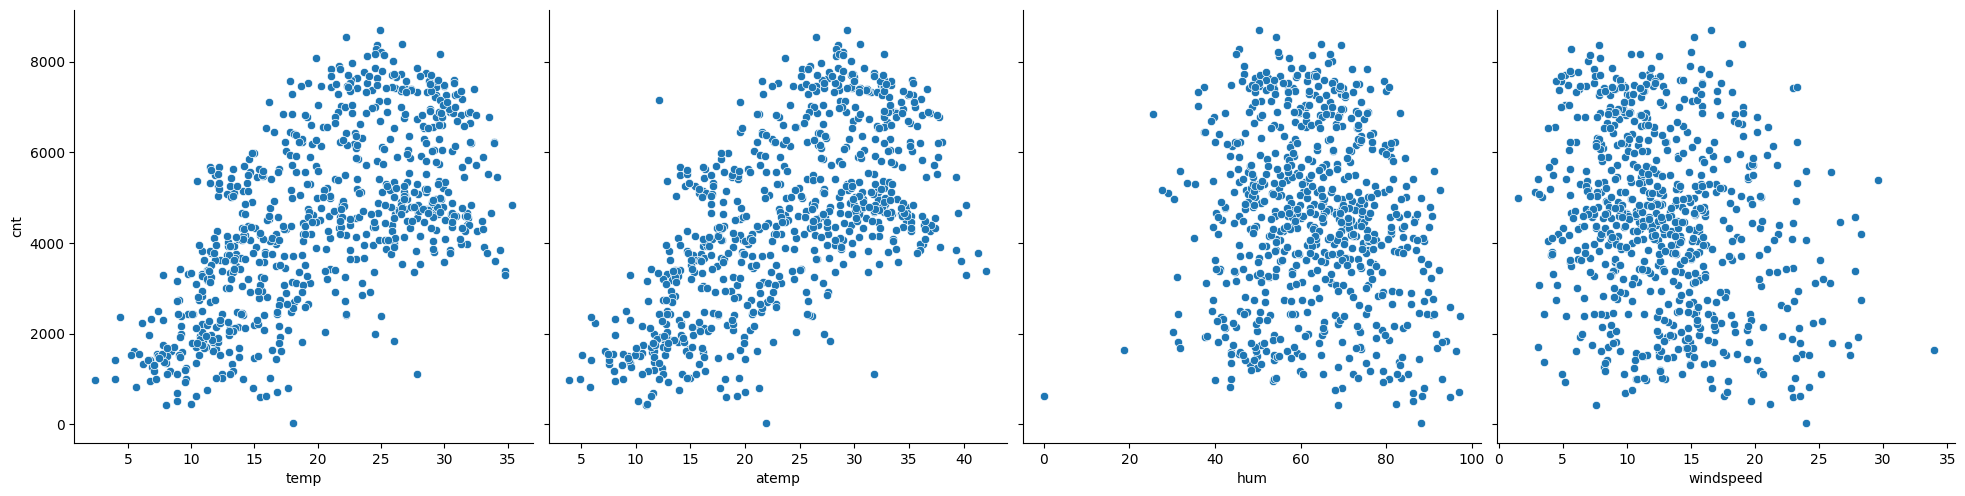

In [251]:
# Let's see how Sales are related with other variables using scatter plot.
sns.pairplot(bikesharedata, x_vars=['temp', 'atemp', 'hum','windspeed'], y_vars='cnt', height=5, aspect=1, kind='scatter')
plt.show()

### Multivariate Analysis

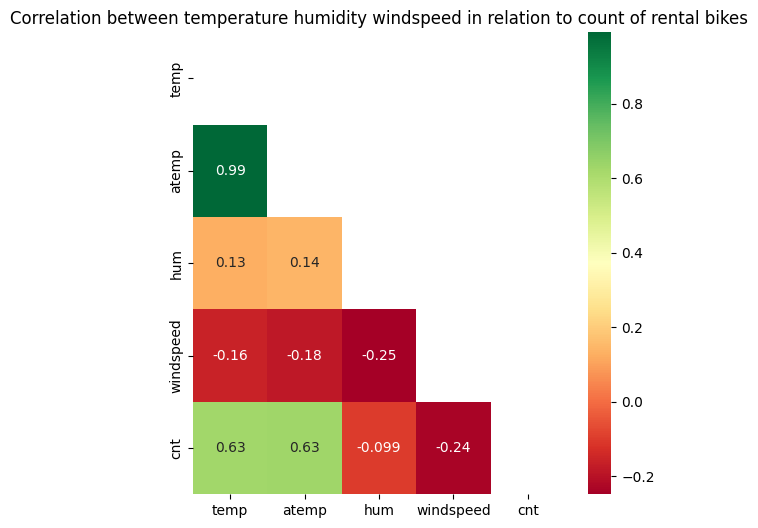

In [252]:
# Checking the correlation between the numerical variables

plt.figure(figsize = (6,6))
matrix = np.triu(bikesharedata[['temp','atemp','hum','windspeed','cnt']].corr())
sns.heatmap(bikesharedata[['temp','atemp','hum','windspeed','cnt']].corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.title("Correlation between temperature humidity windspeed in relation to count of rental bikes")
plt.show()

### There is multicolinearity between temp and atemp so these variables cannot be used as linear relationship exists .

# Step 4 : Train Test Split

In [265]:
#Create a copy of Dataset so that we can keep the original dataset intact for futher analysis if required.

bikesharedatanew = bikesharedata.copy()


In [139]:
#Let's first frop the variables for which we have already created dummy variables for them
#bikesharedatanew.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [153]:
#Let's drop workingday which is correlated with holiday
#bikesharedatanew.drop(['workingday'], axis = 1, inplace = True)

In [264]:
bikesharedatanew.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,sat,sun,thu,tue,wed,cloudy,light_rain,spring,summer,winter
0,spring,0,jan,0,sat,0,cloudy,14.110847,18.18125,80.5833,...,True,False,False,False,False,True,False,True,False,False
1,spring,0,jan,0,sun,0,cloudy,14.902598,17.68695,69.6087,...,False,True,False,False,False,True,False,True,False,False
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,...,False,False,False,False,False,False,False,True,False,False
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,...,False,False,False,True,False,False,False,True,False,False
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,...,False,False,False,False,True,False,False,True,False,False


In [266]:
bikesharedatanew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  aug         730 non-null    bool   
 13  dec         730 non-null    bool   
 14  feb         730 non-null    bool   
 15  jan         730 non-null    bool   
 16  july        730 non-null    bool   
 17  june        730 non-null    bool   
 18  mar         730 non-null    bool   
 19  may         730 non-null    b

In [184]:
# splitting the dataframe into Train and Test

#np.random.seed(0)
#df_train, df_test = train_test_split(bikesharedatanew, train_size = 0.7, random_state = 100)

In [201]:
# check the shape of training datatset

#df_train.shape

In [202]:
# check the shape of testing datatset

#df_test.shape

In [268]:
# Using MinMaxScaler to Rescaling the features

scaler = MinMaxScaler()

In [204]:
# verifying the head of dataset before scaling.

#df_train.head()

In [277]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['yr','temp','atemp','hum','windspeed','cnt']
bikesharedatanew[num_vars] = scaler.fit_transform(bikesharedatanew[num_vars])

In [278]:
# verifying the head after appying scaling.

bikesharedatanew.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,sat,sun,thu,tue,wed,cloudy,light_rain,spring,summer,winter
0,spring,0.0,jan,0,sat,0,cloudy,0.355170,0.373517,0.828620,...,True,False,False,False,False,True,False,True,False,False
1,spring,0.0,jan,0,sun,0,cloudy,0.379232,0.360541,0.715771,...,False,True,False,False,False,True,False,True,False,False
2,spring,0.0,jan,0,mon,1,clear,0.171000,0.144830,0.449638,...,False,False,False,False,False,False,False,True,False,False
3,spring,0.0,jan,0,tue,1,clear,0.175530,0.174649,0.607131,...,False,False,False,True,False,False,False,True,False,False
4,spring,0.0,jan,0,wed,1,clear,0.209120,0.197158,0.449313,...,False,False,False,False,True,False,False,True,False,False


In [279]:
# describing the dataset

bikesharedatanew.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,0.543852,0.519090,0.645400,0.346568,0.516108
std,0.500343,0.167266,0.465405,0.228140,0.213968,0.146402,0.159873,0.222735
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.346084,0.339611,0.534704,0.232045,0.362143
50%,0.500000,0.000000,1.000000,0.548307,0.535942,0.643959,0.326928,0.520766
75%,1.000000,0.000000,1.000000,0.743261,0.695494,0.750535,0.434629,0.683847
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [282]:
bikesharedatanew.shape

(730, 34)

In [285]:
# Let's check the correlation coefficients to see which variables are highly correlated
#sns.heatmap(bikesharedatanew.corr(),annot = True)

# Step 5 : Building the Model

### build lm1 with temperature and windspeed

In [293]:
# Building the Linear Model

# Putting feature variable to X
X = bikesharedatanew[['temp','windspeed']]

# Putting response variable to y
y = bikesharedatanew['cnt']

In [294]:
# Representing LinearRegression as lm(Creating LinearRegression Object)
lm = LinearRegression()

In [295]:
# fit the model to the training data
lm.fit(X,y)

LinearRegression()

In [289]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X = sm.add_constant(X)
# create a fitted model in one line
lm_1 = sm.OLS(y,X).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     32.28
Date:                Wed, 09 Aug 2023   Prob (F-statistic):           3.72e-14
Time:                        18:21:44   Log-Likelihood:                 92.019
No. Observations:                 730   AIC:                            -178.0
Df Residuals:                     727   BIC:                            -164.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8140      0.045     18.238      0.0

### Inference : temperature and windspeed are both significant variables


#### Running second model (lm2) humidity , windspeed , temperature

In [296]:
# Building the Linear Model

# Putting feature variable to X
X = bikesharedatanew[['hum','windspeed','temp']]

# Putting response variable to y
y = bikesharedatanew['cnt']

In [297]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X = sm.add_constant(X)
# create a fitted model in one line
lm_2 = sm.OLS(y,X).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     206.1
Date:                Wed, 09 Aug 2023   Prob (F-statistic):           1.06e-96
Time:                        18:40:28   Log-Likelihood:                 285.87
No. Observations:                 730   AIC:                            -563.7
Df Residuals:                     726   BIC:                            -545.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4995      0.037     13.510      0.0

### The adjusted R2 % has improved

#### Running Third model (lm3) humidity , windspeed , temperature , holiday

In [310]:
# Building the Linear Model

# Putting feature variable to X
X = bikesharedatanew[['hum','windspeed','temp','holiday']]

# Putting response variable to y
y = bikesharedatanew['cnt']

In [311]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X = sm.add_constant(X)
# create a fitted model in one line
lm_3 = sm.OLS(y,X).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     156.2
Date:                Wed, 09 Aug 2023   Prob (F-statistic):           2.49e-96
Time:                        18:55:41   Log-Likelihood:                 287.79
No. Observations:                 730   AIC:                            -565.6
Df Residuals:                     725   BIC:                            -542.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5030      0.037     13.615      0.0

### Inference : Holiday is a signifact factor at the R2 value has improved

#### Running Third model (lm4) dropping humidity ,and with windspeed , temperature , holiday and season

In [315]:
# Building the Linear Model

# Putting feature variable to X
X = bikesharedatanew[['hum','windspeed','temp','holiday','atemp']]

# Putting response variable to y
y = bikesharedatanew['cnt']

In [316]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X = sm.add_constant(X)
# create a fitted model in one line
lm_4 = sm.OLS(y,X).fit()
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     126.2
Date:                Wed, 09 Aug 2023   Prob (F-statistic):           5.10e-96
Time:                        18:57:41   Log-Likelihood:                 289.68
No. Observations:                 730   AIC:                            -567.4
Df Residuals:                     724   BIC:                            -539.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4941      0.037     13.298      0.0

In [317]:
bikesharedatanew.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,sat,sun,thu,tue,wed,cloudy,light_rain,spring,summer,winter
0,spring,0.0,jan,0,sat,0,cloudy,0.355170,0.373517,0.828620,...,True,False,False,False,False,True,False,True,False,False
1,spring,0.0,jan,0,sun,0,cloudy,0.379232,0.360541,0.715771,...,False,True,False,False,False,True,False,True,False,False
2,spring,0.0,jan,0,mon,1,clear,0.171000,0.144830,0.449638,...,False,False,False,False,False,False,False,True,False,False
3,spring,0.0,jan,0,tue,1,clear,0.175530,0.174649,0.607131,...,False,False,False,True,False,False,False,True,False,False
4,spring,0.0,jan,0,wed,1,clear,0.209120,0.197158,0.449313,...,False,False,False,False,True,False,False,True,False,False


## Inference : temperature has a positive correlation with count of rental bikes and windspeed humitidy have a negative correlattion with count. number of rental bikes relate with holiday .

# Conclusion :

The following variables are significant in predicting the demand for shared bikes :
        1) Holiday
        2) Temperature
        3) Spring season
        4) clear weather